<a href="https://colab.research.google.com/github/Hasnainpriam/GAT_HAR/blob/main/GAT_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
path="/content/drive/MyDrive/thesis-data27.csv"
data=pd.read_csv(path)
data = data.drop('Unnamed: 0', axis=1)
data

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,2.223091,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
199802,8.533000,-2.310000,-5.367000,27
199803,8.402000,-2.192000,-4.447000,27
199804,8.661000,-2.593000,-4.205000,27
199805,7.818000,-3.499000,-4.045000,27


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199807 entries, 0 to 199806
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Acc_X   199807 non-null  float64
 1   Acc_Y   199807 non-null  float64
 2   Acc_Z   199807 non-null  float64
 3   Class   199807 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 6.1 MB


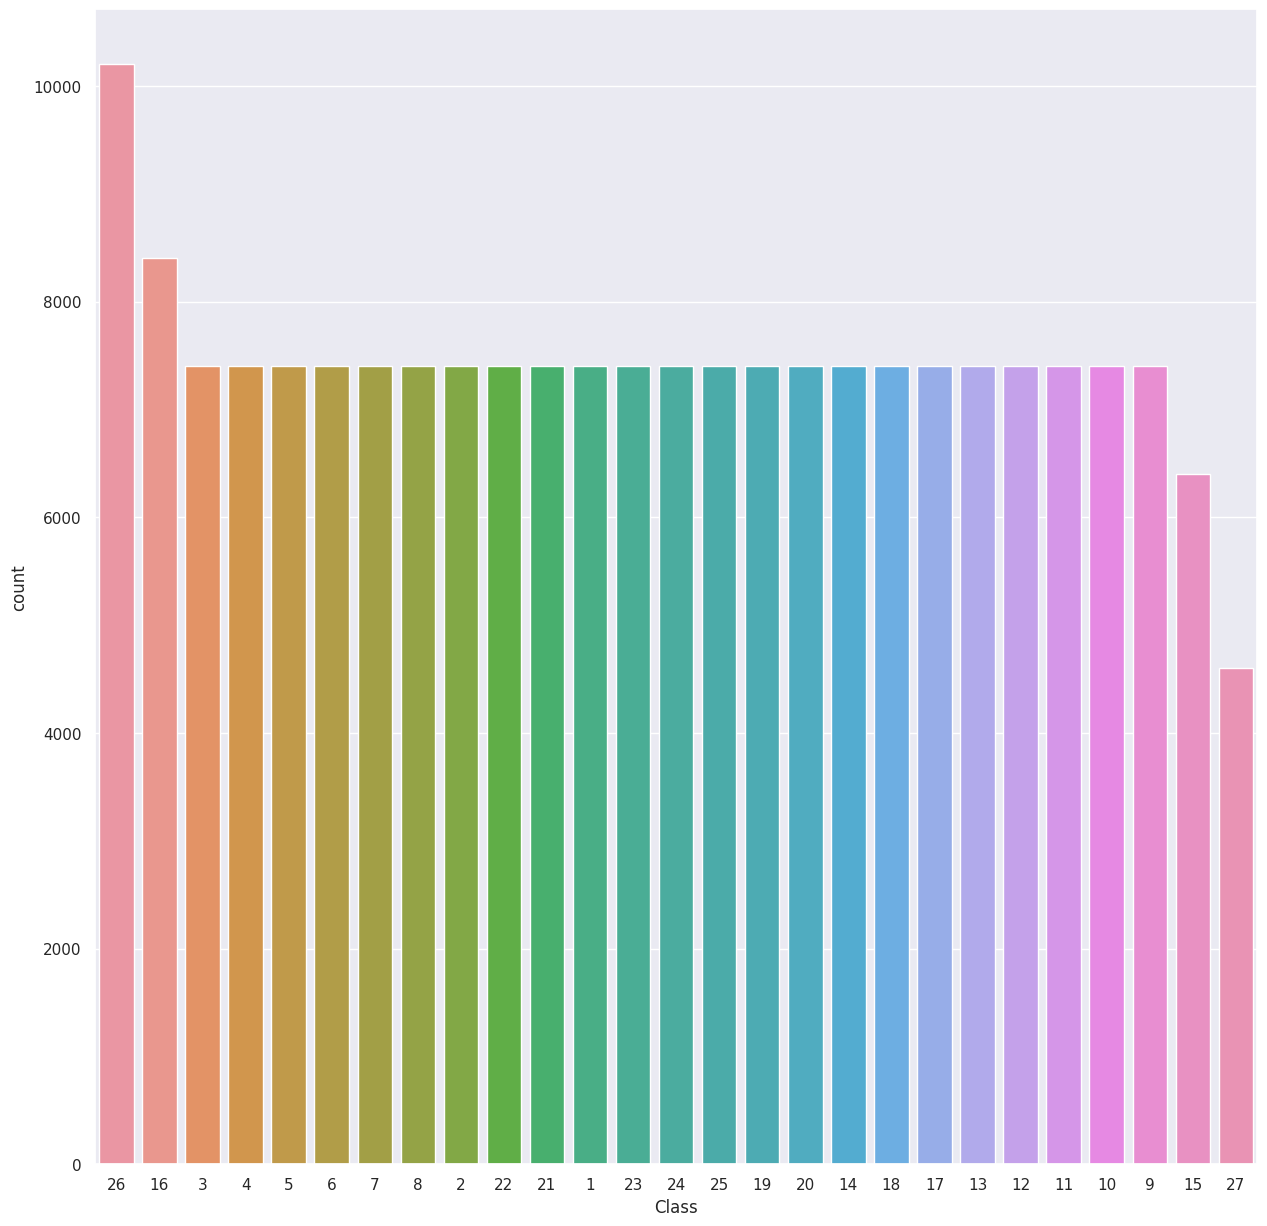

In [ ]:
sns.countplot(x = 'Class',
              data = data,
              order = data.Class.value_counts().index);

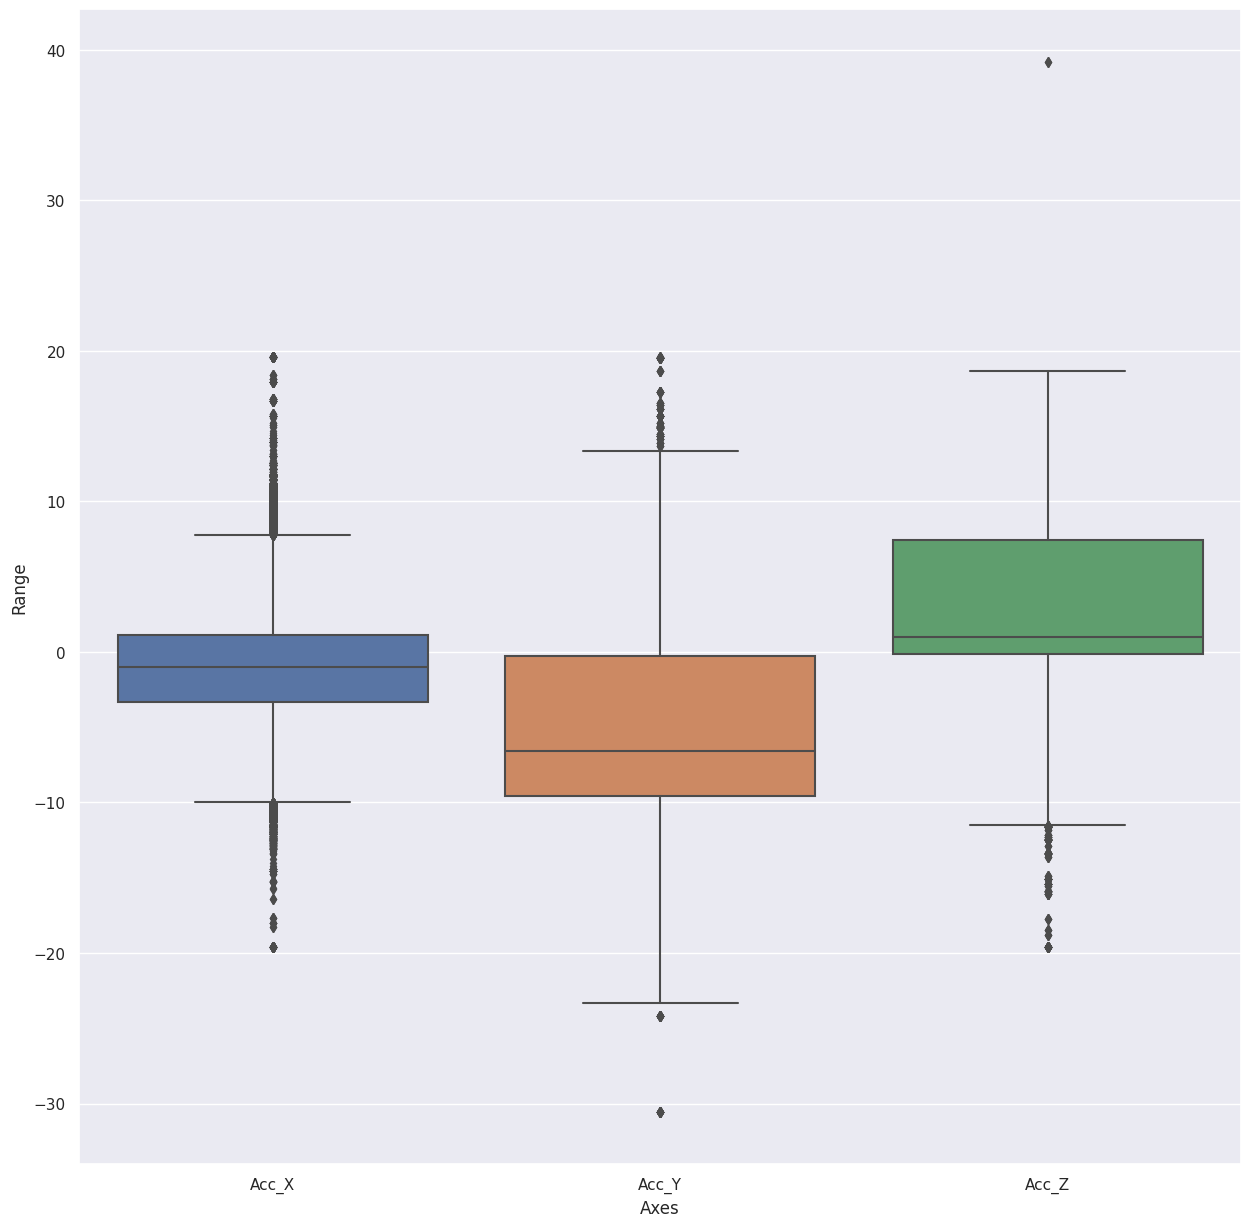

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
plt.xlabel('Axes')
plt.ylabel('Range')
fig= sns.boxplot(data=data.iloc[:,0:3])
figure=fig.get_figure()

In [ ]:
f=0
g=0
p=0


ind=data.index.to_series().groupby(data['Class']).agg(['first','last']).reset_index()
print(ind)

    Class   first    last
0       1       0    7399
1       2    7400   14800
2       3   14801   22201
3       4   22202   29602
4       5   29603   37003
5       6   37004   44404
6       7   44405   51805
7       8   51806   59206
8       9   59207   66606
9      10   66607   74006
10     11   74007   81406
11     12   81407   88806
12     13   88807   96206
13     14   96207  103606
14     15  103607  110006
15     16  110007  118406
16     17  118407  125806
17     18  125807  133206
18     19  133207  140606
19     20  140607  148006
20     21  148007  155406
21     22  155407  162806
22     23  162807  170206
23     24  170207  177606
24     25  177607  185006
25     26  185007  197606
26     27  192407  199806


In [ ]:
for m in range(1,28):
    A = data.loc[data['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,2):
        Avg= np.mean(A.iloc[:,i])
        #Avg
        Q1 = A.iloc[:,i].quantile(0.25)
        #Q1
        Q3 = A.iloc[:,i].quantile(0.75)
        #Q3
        IQR = Q3 - Q1
        #IQR
        lim1=(Q1 - 1.5 * IQR)
        #lim1
        lim2=(Q3 + 1.5 * IQR)
        #lim2
        for ami in range(first,last+1):
            com=data.iloc[ami,i]
            if ((com < lim1) |(com > lim2)):
                data.iloc[ami,i] = Avg
                f=f+1
        print(f)
    if(p<27):
        p=p+1

(7400, 4)
0
7399
0
83
(7401, 4)
7400
14800
83
118
(7401, 4)
14801
22201
118
320
(7401, 4)
22202
29602
576
1528
(7401, 4)
29603
37003
1528
1528
(7401, 4)
37004
44404
1528
1528
(7401, 4)
44405
51805
1528
1528
(7401, 4)
51806
59206
2357
2380
(7400, 4)
59207
66606
2689
2753
(7400, 4)
66607
74006
2871
2871
(7400, 4)
74007
81406
2871
3180
(7400, 4)
81407
88806
3313
3458
(7400, 4)
88807
96206
3897
3897
(7400, 4)
96207
103606
3897
3946
(6400, 4)
103607
110006
5431
5431
(8400, 4)
110007
118406
5431
5431
(7400, 4)
118407
125806
6579
6579
(7400, 4)
125807
133206
6585
6585
(7400, 4)
133207
140606
6585
6585
(7400, 4)
140607
148006
6714
6792
(7400, 4)
148007
155406
6792
6792
(7400, 4)
155407
162806
7263
7852
(7400, 4)
162807
170206
9105
9608
(7400, 4)
170207
177606
9616
9653
(7400, 4)
177607
185006
9653
10186
(10200, 4)
185007
197606
10793
10793
(4600, 4)
192407
199806
10870
10903


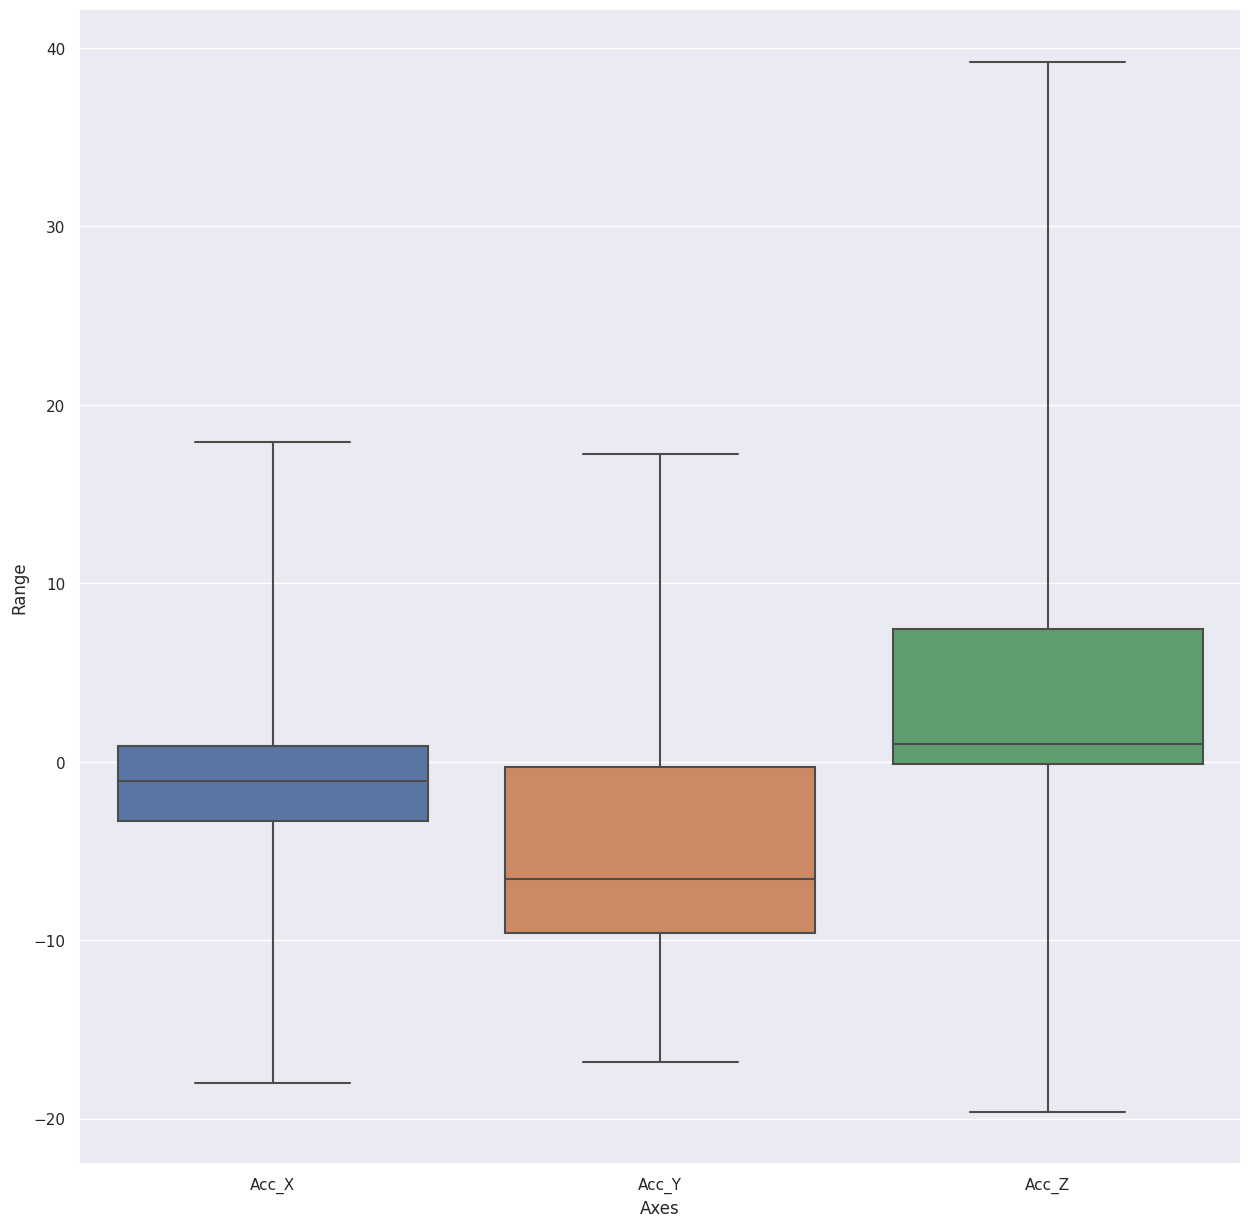

In [ ]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
plt.xlabel('Axes')
plt.ylabel('Range')
fig=sns.boxplot(data=data.iloc[:,0:3],whis=[0, 100])
count=0
figure=fig.get_figure()

In [ ]:
data.to_csv('withoutoutlier.csv')

In [ ]:
balanced_data = pd.read_csv('withoutoutlier.csv')
balanced_data

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Class
0,0,2.660984,-9.653030,0.470237,1
1,1,2.223091,-9.432167,2.223091,1
2,2,2.098372,-9.481953,0.926070,1
3,3,2.716461,-9.739352,0.912008,1
4,4,2.288388,-9.371498,0.910390,1
...,...,...,...,...,...
199802,199802,8.533000,-2.310000,-5.367000,27
199803,199803,8.402000,-2.192000,-4.447000,27
199804,199804,8.661000,-2.593000,-4.205000,27
199805,199805,7.818000,-3.499000,-4.045000,27


In [ ]:
balanced_data=balanced_data.drop('Unnamed: 0', axis=1)
balanced_data

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,-9.432167,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
199802,8.533000,-2.310000,-5.367000,27
199803,8.402000,-2.192000,-4.447000,27
199804,8.661000,-2.593000,-4.205000,27
199805,7.818000,-3.499000,-4.045000,27


In [ ]:
balanced_data = balanced_data[(balanced_data.Class != 5) & (balanced_data.Class != 6) & (balanced_data.Class != 15)& (balanced_data.Class != 24)]
balanced_data

,Acc_X,Acc_Y,Acc_Z,Class
0,2.660984,-9.653030,0.470237,1
1,2.223091,-9.432167,2.223091,1
2,2.098372,-9.481953,0.926070,1
3,2.716461,-9.739352,0.912008,1
4,2.288388,-9.371498,0.910390,1
...,...,...,...,...
199802,8.533000,-2.310000,-5.367000,27
199803,8.402000,-2.192000,-4.447000,27
199804,8.661000,-2.593000,-4.205000,27
199805,7.818000,-3.499000,-4.045000,27


In [ ]:
label = LabelEncoder()

balanced_data['label'] = label.fit_transform(balanced_data['Class'])
balanced_data

<ipython-input-82-fa6d2622cef1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_data['label'] = label.fit_transform(balanced_data['Class'])


,Acc_X,Acc_Y,Acc_Z,Class,label
0,2.660984,-9.653030,0.470237,1,0
1,2.223091,-9.432167,2.223091,1,0
2,2.098372,-9.481953,0.926070,1,0
3,2.716461,-9.739352,0.912008,1,0
4,2.288388,-9.371498,0.910390,1,0
...,...,...,...,...,...
199802,8.533000,-2.310000,-5.367000,27,22
199803,8.402000,-2.192000,-4.447000,27,22
199804,8.661000,-2.593000,-4.205000,27,22
199805,7.818000,-3.499000,-4.045000,27,22


In [ ]:
dfn = balanced_data
dfn

,Acc_X,Acc_Y,Acc_Z,Class,label
0,2.660984,-9.653030,0.470237,1,0
1,2.223091,-9.432167,2.223091,1,0
2,2.098372,-9.481953,0.926070,1,0
3,2.716461,-9.739352,0.912008,1,0
4,2.288388,-9.371498,0.910390,1,0
...,...,...,...,...,...
199802,8.533000,-2.310000,-5.367000,27,22
199803,8.402000,-2.192000,-4.447000,27,22
199804,8.661000,-2.593000,-4.205000,27,22
199805,7.818000,-3.499000,-4.045000,27,22


In [ ]:
X = dfn[['Acc_X', 'Acc_Y', 'Acc_Z']]
y = dfn['label']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[ 0.85781211, -0.94173197, -0.56621771],
       [ 0.74856246, -0.90332142, -0.16647194],
       [ 0.71744639, -0.91197982, -0.46226307],
       ...,
       [ 2.35475232,  0.28608406, -1.63242531],
       [ 2.14443278,  0.1285208 , -1.59593664],
       [ 1.83356902,  0.20017208, -1.49399639]])

In [ ]:
scaled_X = pd.DataFrame(data = X, columns = ['Acc_X', 'Acc_Y', 'Acc_Z'])


In [ ]:
scaled_X['mag'] = np.sqrt(scaled_X['Acc_X'] ** 2 + scaled_X['Acc_Y'] ** 2 + scaled_X['Acc_Z'] ** 2)
scaled_X['label'] = y.values

scaled_X.head()

,Acc_X,Acc_Y,Acc_Z,mag,label
0,0.857812,-0.941732,-0.566218,1.394024,0
1,0.748562,-0.903321,-0.166472,1.184925,0
2,0.717446,-0.911980,-0.462263,1.249049,0
3,0.871653,-0.956744,-0.465470,1.375428,0
4,0.764853,-0.892770,-0.465839,1.264534,0


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Range- m/s^2')

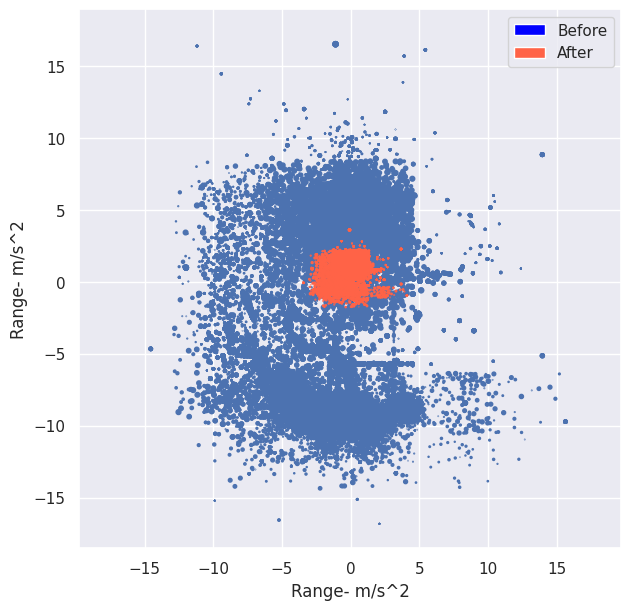

In [ ]:
plt.figure(figsize=(7,7))
legend_elements = [Patch(facecolor='blue',
                         label='Before'),
                   Patch(facecolor='tomato',
                         label='After')]

# Create the figure
plt.legend(handles=legend_elements)

plt.scatter(balanced_data['Acc_X'],balanced_data['Acc_Y'],balanced_data['Acc_Z'])
plt.scatter(scaled_X['Acc_X'],scaled_X['Acc_Y'],scaled_X['Acc_Z'],color='tomato')
plt.xlabel("Range- m/s^2")
plt.ylabel("Range- m/s^2")

In [ ]:
scaled_X = scaled_X.drop(['Acc_X', 'Acc_Y', 'Acc_Z'], axis=1)

scaled_X

,mag,label
0,1.394024,0
1,1.184925,0
2,1.249049,0
3,1.375428,0
4,1.264534,0
...,...,...
171200,3.017967,22
171201,2.866944,22
171202,2.879499,22
171203,2.676214,22


In [ ]:
import scipy.stats as stats

In [ ]:
Fs = 20
frame_size = Fs * 20
hop_size = Fs * 1
frames = []
labels = []

for i in range(0, len(scaled_X) - frame_size, hop_size):
    x = scaled_X['mag'].values[i: i + frame_size]
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x])
    labels.append(label)

<ipython-input-91-d5294cde681b>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]


In [ ]:
len(frames) , len(labels)

(8541, 8541)

In [ ]:
frames = np.asarray(frames).reshape(-1, frame_size)
labels = np.asarray(labels)

In [ ]:
print("RESHAPE SHAPE: ",frames.shape)
print("LABELS: ",labels.shape)

RESHAPE SHAPE:  (8541, 400)
LABELS:  (8541,)


In [ ]:
x=frames
y=labels

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123, stratify=y)


In [ ]:
training_files=[x_train, y_train]
subject_files=[x_test, y_test]

In [ ]:
class ProgressMeter(object):
    def __init__(self, num_batches, *meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def print(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'

In [ ]:
import torch
from torch.utils.data import Dataset


class LoadDataset_from_numpy(Dataset):
    def __init__(self, np_data):
        super(LoadDataset_from_numpy, self).__init__()
        X_train = np_data[0]
        y_train = np_data[1]
        self.len = X_train.shape[0]
        self.x_data = torch.from_numpy(X_train).float()
        self.y_data = torch.from_numpy(y_train).long()
        self.x_data = self.x_data.view(self.x_data.size()[0], 1, self.x_data.size()[1])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


def data_generator_np(training_files, subject_files, batch_size):
    train_dataset = LoadDataset_from_numpy(training_files)
    test_dataset = LoadDataset_from_numpy(subject_files)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True,
                                               drop_last=True,
                                               num_workers=0)

    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False,
                                              drop_last=True,
                                              num_workers=0)

    return train_loader, test_loader

In [ ]:

train_loader, test_loader = data_generator_np(training_files, subject_files, 64)
#batch_size=64

In [ ]:
import torch.nn as nn
from torch.nn import functional as f



class SignalSegmentDefinition(nn.Module):

    def __init__(self, kernel_size, stride):
        super().__init__()
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        b = f.unfold(x, kernel_size=self.kernel_size, stride=self.stride)  # overlapping sliding window
        b = b.permute(0, 2, 1)
        b = b.unsqueeze(-2)
        return b


class SignalSegmentRepresentation(nn.Module):

    def __init__(self, segment_size, overlapping_rate, segment_num):
        super(SignalSegmentRepresentation, self).__init__()
        self.overlapping = int(segment_size - segment_size * overlapping_rate)
        self.segment = SignalSegmentDefinition((1, segment_size), self.overlapping)
        self.segment2vec = SignalSegment2Vec(30)
        self.gna = GNA(segment_num)

    def forward(self, x):
        signal_segments = []
        x = self.segment(x)
        x = x.squeeze()
        for idx in range(x.size()[1]):
            data = x[:, idx, :]
            data = data.unsqueeze(1)
            out = self.segment2vec(data)
            out = out.view(x.size()[0], 1, -1)
            signal_segments.append(out)
        signal_segments = torch.cat(signal_segments, dim=1)
        signal_segments = signal_segments .unsqueeze(2)
        "global node attention"
        signal_segments = self.gna(signal_segments).permute(0, 2, 1, 3)
        return signal_segments


class GNA(nn.Module):

    def __init__(self, channel, reduction=2):
        super(GNA, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x)
        y = self.fc(y)
        return x * y.expand_as(x)


class SignalSegment2Vec(nn.Module):

    def __init__(self, afr_reduced_cnn_size):
        super(SignalSegment2Vec, self).__init__()
        self.features = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=49, stride=6, bias=False, padding=int(49//2)),
            nn.BatchNorm1d(64),
            nn.GELU(),
            nn.MaxPool1d(kernel_size=7, stride=4, padding=int(7//2)),

            nn.Conv1d(64, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.Conv1d(128, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.MaxPool1d(kernel_size=3, stride=4, padding=int(3//2)),
        )

        self.inplanes = 128
        self.AFR = self._make_layer(ResBasicBlock, afr_reduced_cnn_size, 1)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv1d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.features(x)
        x = self.AFR(x)
        return x



class ResLayer(nn.Module):
    def __init__(self, channel, reduction=2):
        super(ResLayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.GELU(),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1)
        return x * y.expand_as(x)


class ResBasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, reduction=4):
        super(ResBasicBlock, self).__init__()
        self.conv1 = nn.Conv1d(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm1d(planes)
        self.relu = nn.GELU()
        self.conv2 = nn.Conv1d(planes, planes, 1)
        self.bn2 = nn.BatchNorm1d(planes)
        self.reslayer = ResLayer(planes, reduction)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.reslayer(out)
        if self.downsample is not None:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [ ]:
class Attention(nn.Module):

    def __init__(self, channel, reduction=2):
        super().__init__()
        self.attn = nn.Sequential(
            nn.AdaptiveAvgPool2d((None, 1)),
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        B, M, K, _ = x.size()
        adj = self.pearson(x)  # adjacency matrix
        x_ = self._prepare_attentional_mechanism_input(x)
        e = self.attn(x_)
        e = e.permute(0, 2, 1, 3).contiguous()
        e = e.view(B, M, K, K)
        zero_vec_adj = -9e15 * torch.ones_like(adj)
        attention = torch.where(adj > 0, e, zero_vec_adj)
        attention = f.softmax(attention, dim=-1)
        x = torch.matmul(attention, x)
        return x, adj

    def h_matmul(self, x):
        N = x.size()[-2]
        x_repeated_in_chunks = x.repeat_interleave(N, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, N, 1)
        result = torch.mul(x_repeated_in_chunks, x_repeated_alternating)
        return result

    def pearson(self, x):
        centered_h = x - x.mean(dim=-1, keepdim=True)
        covariance = self.h_matmul(centered_h).sum(dim=-1, keepdim=True)
        bessel_corrected_covariance = torch.div(covariance, (x.shape[-1] - 1))
        std_h = x.std(dim=-1, keepdim=True)
        p = torch.div(bessel_corrected_covariance, (self.h_matmul(std_h)))
        p = p.view(x.size()[0], x.size()[1], x.size()[2], -1)
        return p

    def _prepare_attentional_mechanism_input(self, x):
        B, _, K, _ = x.size()
        x_repeated_in_chunks = x.repeat_interleave(K, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, K, 1)

        pos = 2 * torch.ones_like(x_repeated_alternating)
        one_vec = torch.ones_like(x_repeated_alternating)
        x_repeated_in_chunks.eq(x_repeated_alternating)
        pos = torch.where(x_repeated_in_chunks.eq(x_repeated_alternating) > 0, one_vec, pos)
        x_repeated_alternating = pos * x_repeated_alternating

        all_combinations_matrix = torch.cat([x_repeated_in_chunks, x_repeated_alternating], dim=-1)
        all_combinations_matrix = all_combinations_matrix.permute(0, 2, 1, 3)
        return all_combinations_matrix


class Block(nn.Module):

    def __init__(self, node_size, input_size, kernel_size, stride, multi_heads):
        super().__init__()

        expand = 1

        padding = kernel_size//2
        self.mid_channels_ = (multi_heads - kernel_size + 2 * padding) // stride + 1

        self.multi_head = nn.Sequential(
            nn.Conv2d(input_size, multi_heads, 1, bias=False),
            nn.Conv2d(multi_heads, multi_heads, 1, bias=False)
        )

        self.feature_extraction = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding,
                      groups=node_size, bias=False),
            nn.BatchNorm2d(node_size),
            nn.GELU()
        )

        self.attn = Attention(node_size * node_size)

        self.feed_forward = nn.Sequential(
            nn.Conv2d(self.mid_channels_, self.mid_channels_ * 4, 1, bias=False),
            nn.BatchNorm2d(self.mid_channels_ * 4),
            nn.GELU(),
            nn.Conv2d(self.mid_channels_ * 4, multi_heads * expand, 1, bias=False),
            nn.BatchNorm2d(multi_heads)
        )

        self.shortcut = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding, bias=False),
            nn.BatchNorm2d(node_size),
            nn.AdaptiveAvgPool2d((1, None))
        )

        self.norm = nn.BatchNorm2d(multi_heads)

    def forward(self, x):
        res = x.permute(0, 2, 1, 3)                 # B, J, K, C -> B, K, J, C
        "Dense layers"
        out = self.multi_head(x)                    # B, J, K, C -> B, M, K, C, where M is the number of heads
        out, adj = self.attn(out)
        self.adj = adj                              # for visualization
        out = f.gelu(self.norm(out))
        out = out.permute(0, 2, 1, 3)               # B, M, K, C -> B, K, M, C
        "Attention Layers"
        out = self.feature_extraction(out)          # B, K, M, C -> B, K, M', C'
        out = out.permute(0, 2, 1, 3)               # B, K, M', C' -> B, M', K, C'
        out = self.feed_forward(out)                # B, M', K, C' -> B, M'', K, C''
        shortcut = self.shortcut(res)               # B, K, J, C -> B, 1, K, C''
        shortcut = shortcut.permute(0, 2, 1, 3)
        out += shortcut                             # (B, M'', K, C'') + (B, 1, K, C'') -> (B, M'', K, C'') Broadcast
        return out

In [ ]:
import torch.nn.functional as F


In [ ]:
class GRAPHSENSOR(nn.Module):

    def __init__(self, segment_size, overlapping_rate, in_channels, class_num):
        super(GRAPHSENSOR, self).__init__()
        self.segment_size = segment_size
        self.signal_segments = SignalSegmentRepresentation(segment_size, overlapping_rate, in_channels)

        self.attn = nn.Sequential(
            Block(in_channels, 1,   5, 2, 16),
            Block(in_channels, 16,  5, 2, 32),
            Block(in_channels, 32,  5, 1, 64),
            Block(in_channels, 64,  5, 1, 128),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels * 128, 512, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.GELU()
        )
        self.avgpool = nn.AdaptiveAvgPool2d((None, 1))
        self.conv3 = nn.Sequential(
            nn.Conv2d(512, 1024, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.GELU()
        )
        self.conv4 = nn.Conv2d(1024, class_num, 1, bias=False)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.signal_segments(x)
        x = self.attn(x)
        x = self.avgpool(x)
        x = x.flatten(1).unsqueeze(-1).unsqueeze(-1)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.flatten(1)
        return F.log_softmax(x, dim=-1)

In [ ]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [ ]:
model = GRAPHSENSOR(segment_size=80, overlapping_rate=0.5, in_channels=9, class_num=23).to(device)

In [ ]:
def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameter')

The model has 1,563,816 trainable parameter


In [ ]:
if torch.cuda.device_count() >= 1:
        print("num GPUs: ", torch.cuda.device_count())
        model = nn.DataParallel(model).to(device)

num GPUs:  1


In [ ]:
best_acc = 0
best_f1 = 0

In [ ]:
import os
import argparse
import time
import random
import torch.optim as optim

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001, amsgrad=True)
criterion = nn.CrossEntropyLoss().to(device)

In [ ]:
start_time = time.time()

In [ ]:
def adjust_learning_rate(optimizer, epoch, args):
    if epoch == 20:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 0.0001

In [ ]:
class AverageMeter(object):
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)

In [ ]:
def accuracy_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
        correct = 0
        correct += torch.sum(pred == target).item()
        return correct * 100 / len(target)


def f1_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
    return f1_score(pred.cpu().numpy(), target.data.cpu().numpy(), average='macro')

In [ ]:
test_accuracies = []
test_f1_scores = []
test_losses=[]

train_accuracies = []
train_f1_scores = []
train_losses=[]

epoch_train_accuracies = []
epoch_train_f1_scores = []
epoch_train_losses=[]

In [ ]:
def train(train_loader, model, criterion, optimizer, epoch, print_interval):
    batch_time = AverageMeter('Time', ':6.3f')
    data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score', ':.4e')

    # switch to train mode
    model.train()

    end = time.time()
    for i, (data, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        losses.update(loss.item(), data.size(0))
        acc = accuracy_(output, target)
        f1 = f1_(output, target) * 100
        accuracy.update(acc, data.size(0))
        f1_score.update(f1, data.size(0))

        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % print_interval == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'accuracy {accuracy.val:.3f} ({accuracy.avg:.3f})\t'
                  'f1_score {f1_score.val:.3f} ({f1_score.avg:.3f})'.format(
                epoch, i, len(train_loader), loss=losses, accuracy=accuracy, f1_score=f1_score))

        epoch_train_accuracies.append(accuracy.avg)
        epoch_train_f1_scores.append(f1_score.avg )
        epoch_train_losses.append(losses.avg )

    train_accuracies.append(sum(epoch_train_accuracies)/len(epoch_train_accuracies))
    train_f1_scores.append(sum(epoch_train_f1_scores)/len(epoch_train_f1_scores) )
    train_losses.append(sum(epoch_train_losses)/len(epoch_train_losses) )

    print(" Train: accuracy", train_accuracies[-1]," loss" ,train_losses[-1]," f1 score:", train_f1_scores[-1])

    epoch_train_accuracies.clear()
    epoch_train_f1_scores.clear()
    epoch_train_losses.clear()

In [ ]:
def validate(val_loader, model, criterion, args):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score ', ':.4e')
    progress = ProgressMeter(len(val_loader), losses, accuracy, f1_score,
                             prefix='Test: ')

    # switch to evaluate mode
    model.eval()
    with torch.no_grad():
        end = time.time()
        for i, (data, target) in enumerate(val_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)

            losses.update(loss.item(), data.size(0))
            acc = accuracy_(output, target)
            f1 = f1_(output, target) * 100
            accuracy.update(acc, data.size(0))
            f1_score.update(f1, data.size(0))

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()



            # TODO: this should also be done with the ProgressMeter
        print(' Test: accuracy {accuracy.avg:.3f} loss {loss.avg:.4f} f1_score {f1_score.avg:.3f} '
              .format(accuracy=accuracy,loss=losses, f1_score=f1_score))

        test_accuracies.append(accuracy.avg)
        test_f1_scores.append(f1_score.avg )
        test_losses.append(losses.avg )

        return accuracy.avg, f1_score.avg

In [ ]:
epochs=300

In [ ]:
for epoch in range(epochs):
    print("\nStart of epoch NO: %d" % (epoch,))
    adjust_learning_rate(optimizer, epoch, args=1)
    train(train_loader, model, criterion,  optimizer, epoch, print_interval=40)
    acc, f1 = validate(test_loader, model, criterion,  args=1)

    is_best = acc > best_acc
    best_acc = max(acc, best_acc)

    if is_best:
            print('Saving..')
            best_f1 = f1
            state = {
                'model': model.state_dict(),
                'best_acc1': best_acc,
                'best_acc5': best_f1,
                'epoch': epoch,
            }
            if not os.path.isdir('checkpoint'):
                os.mkdir('checkpoint')
            filename = "best_model"
            torch.save(state, './checkpoint/' + filename + '_ckpt.t7')

    time_interval = time.time() - start_time
    time_split = time.gmtime(time_interval)
    print("Model Training time: ", time_interval, "Hour: ", time_split.tm_hour, "Minute: ", time_split.tm_min, "Second: ",
              time_split.tm_sec, end='')
    print("\n Test best accuracy:", best_acc, " Test best f1 score:", best_f1)


Start of epoch NO: 0
Epoch: [0][0/106]	Loss 3.2241 (3.2241)	accuracy 4.688 (4.688)	f1_score 5.281 (5.281)
Epoch: [0][40/106]	Loss 1.8303 (2.0228)	accuracy 26.562 (28.697)	f1_score 22.063 (20.918)
Epoch: [0][80/106]	Loss 1.4938 (1.7981)	accuracy 45.312 (34.722)	f1_score 33.636 (26.773)
 Train: accuracy 29.443307175340436  loss 2.026048409248102  f1 score: 21.91775917757453
 Test: accuracy 47.115 loss 1.4507 f1_score 38.959 
Saving..
Model Training time:  7.979170322418213 Hour:  0 Minute:  0 Second:  7
 Test best accuracy: 47.11538461538461  Test best f1 score: 38.95948481121907

Start of epoch NO: 1
Epoch: [1][0/106]	Loss 1.3830 (1.3830)	accuracy 48.438 (48.438)	f1_score 42.930 (42.930)
Epoch: [1][40/106]	Loss 1.3708 (1.3677)	accuracy 46.875 (47.294)	f1_score 39.082 (40.313)
Epoch: [1][80/106]	Loss 1.0369 (1.2944)	accuracy 56.250 (50.058)	f1_score 42.879 (42.534)
 Train: accuracy 48.93075021364882  loss 1.3270088277519043  f1 score: 41.41330565304278
 Test: accuracy 48.798 loss 1.3082

In [ ]:
len(train_accuracies) , len(train_losses),len(train_f1_scores)

(300, 300, 300)

In [ ]:
len(epoch_train_accuracies) , len(epoch_train_losses),len(epoch_train_f1_scores)

(0, 0, 0)

In [ ]:
len(test_accuracies) , len(test_losses),len(test_f1_scores)

(300, 300, 300)

In [ ]:
test_avg_accuracy = sum(test_accuracies)/len(test_accuracies)
test_avg_loss=sum(test_losses)/len(test_losses)
test_avg_f1_score = sum(test_f1_scores)/len(test_f1_scores)

print('Test_Avg_Accuracy =',float("{:.2f}".format(test_avg_accuracy)))
print('Test_Avg_Loss =',float("{:.2f}".format(test_avg_loss)))
print('Test_Avg_F1_score =',float("{:.2f}".format(test_avg_f1_score)))

Test_Avg_Accuracy = 91.25
Test_Avg_Loss = 0.25
Test_Avg_F1_score = 89.29


In [ ]:
train_avg_accuracy = sum(train_accuracies)/len(train_accuracies)
train_avg_loss=sum(train_losses)/len(train_losses)
train_avg_f1_score = sum(train_f1_scores)/len(train_f1_scores)

print('Train_Avg_Accuracy =',float("{:.2f}".format(train_avg_accuracy)))
print('Train_Avg_Loss =',float("{:.2f}".format(train_avg_loss)))
print('Train_Avg_F1_score =',float("{:.2f}".format(train_avg_f1_score)))

Train_Avg_Accuracy = 94.01
Train_Avg_Loss = 0.17
Train_Avg_F1_score = 92.52


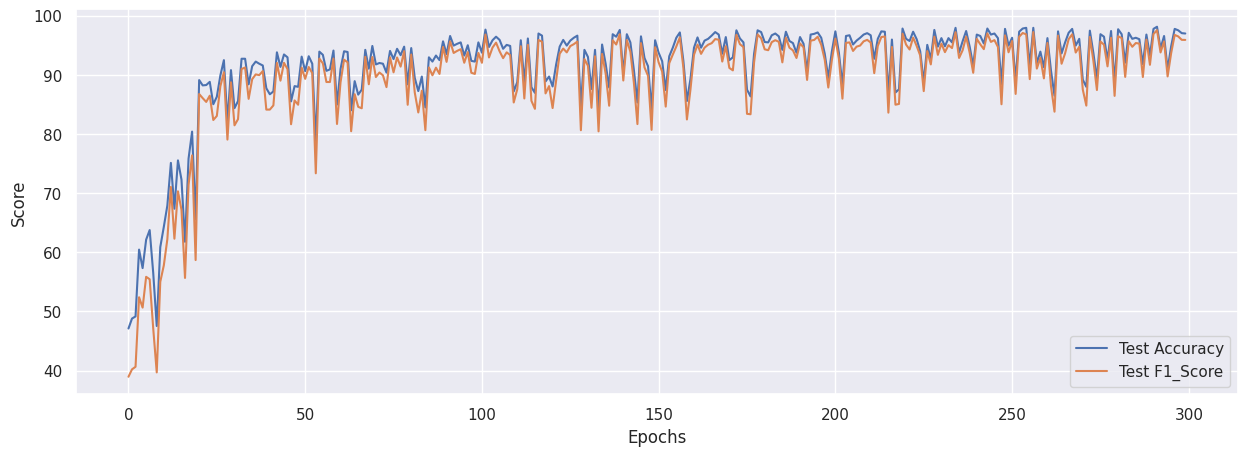

In [ ]:
plt.figure(figsize=(15,5))
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.plot(test_accuracies, label = "Test Accuracy")
plt.plot(test_f1_scores, label = "Test F1_Score")
plt.legend()


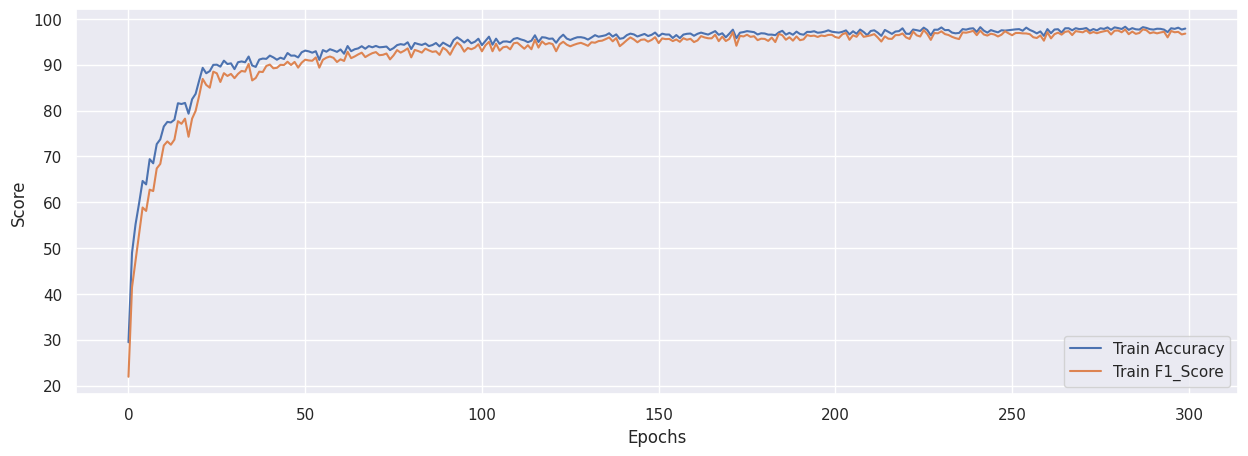

In [ ]:

plt.figure(figsize=(15,5))
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.plot(train_accuracies, label = "Train Accuracy")
plt.plot(train_f1_scores, label = "Train F1_Score")
plt.legend()


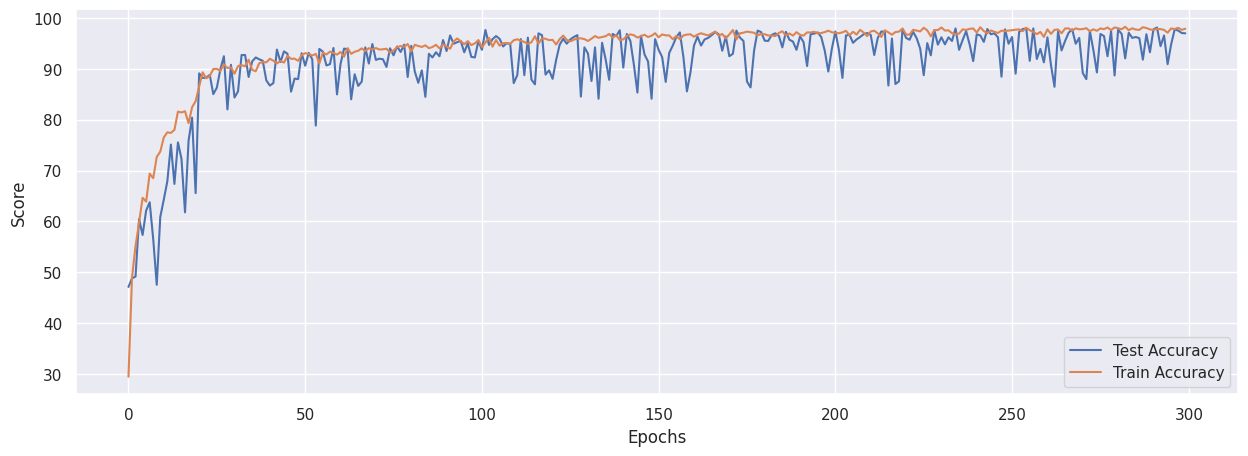

In [ ]:
plt.figure(figsize=(15,5))
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.plot(test_accuracies, label = "Test Accuracy")
plt.plot(train_accuracies, label = "Train Accuracy")
plt.legend()


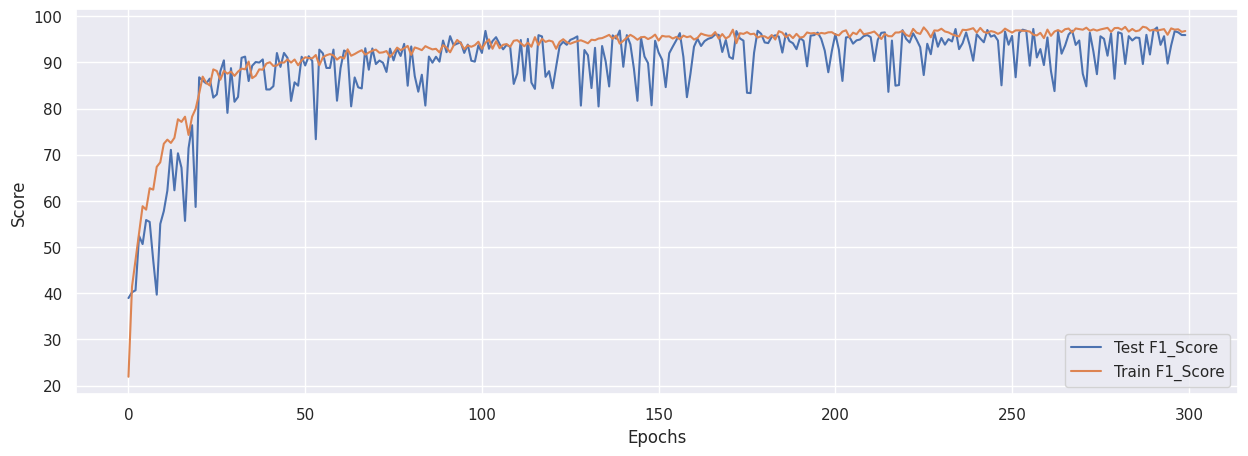

In [ ]:
plt.figure(figsize=(15,5))
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.plot(test_f1_scores, label = "Test F1_Score")
plt.plot(train_f1_scores, label = "Train F1_Score")
plt.legend()

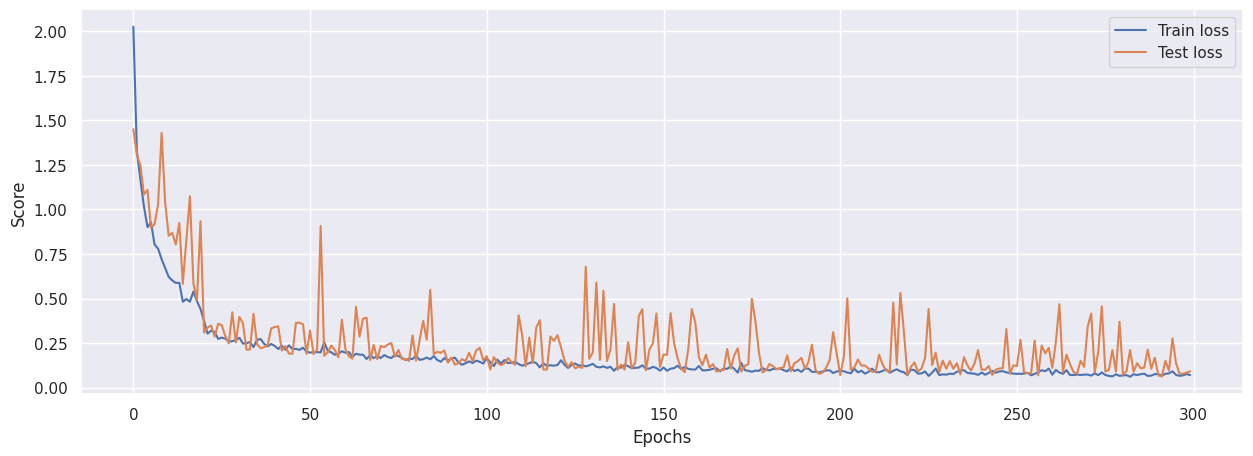

In [ ]:
plt.figure(figsize=(15,5))
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.plot(train_losses, label = "Train loss")
plt.plot(test_losses, label = "Test loss")
plt.legend()

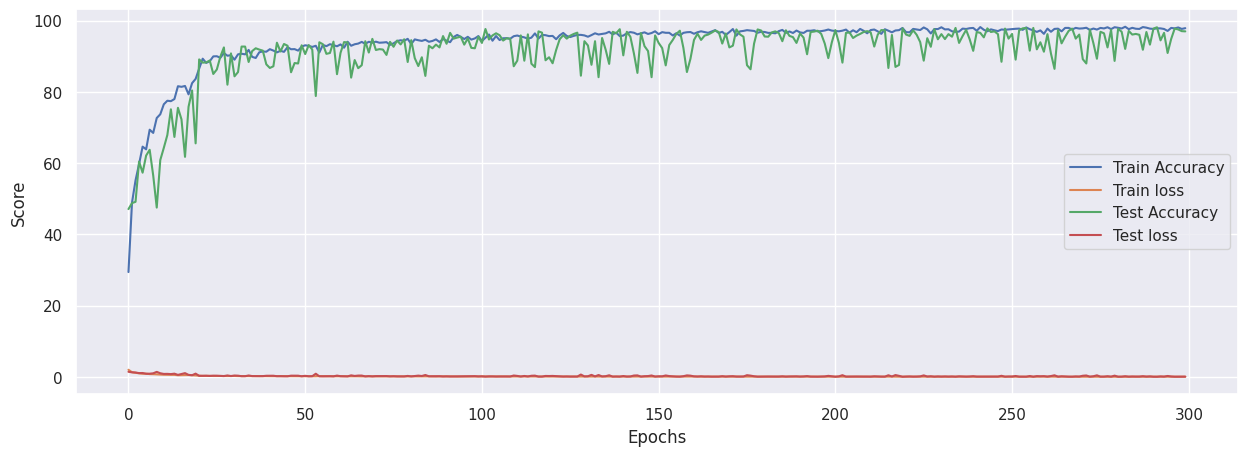

In [ ]:
plt.figure(figsize=(15,5))
plt.ylabel('Score')
plt.xlabel('Epochs')
plt.plot(train_accuracies, label = "Train Accuracy")
plt.plot(train_losses, label = "Train loss")
plt.plot(test_accuracies, label = "Test Accuracy")
plt.plot(test_losses, label = "Test loss")
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix

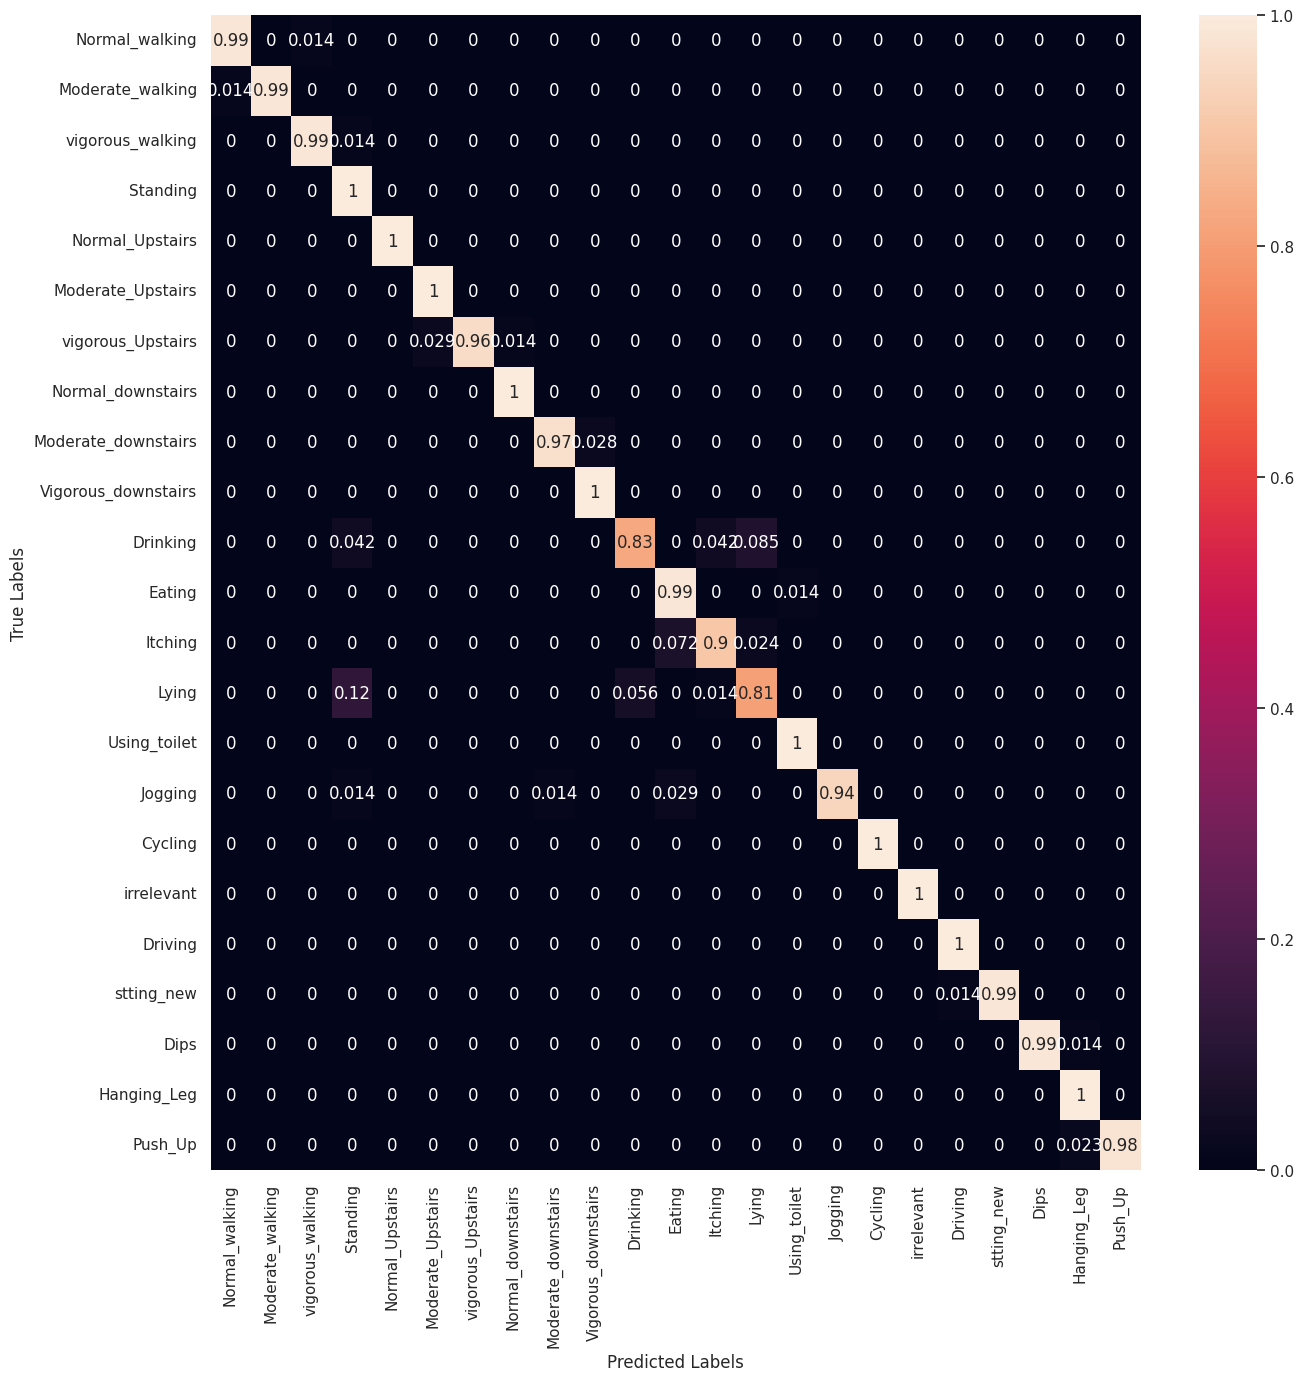

In [ ]:
y_pred = []
y_true = []

# iterate over test data
for inputs, labels in test_loader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ( 'Normal_walking','Moderate_walking','vigorous_walking',
            'Standing','Normal_Upstairs','Moderate_Upstairs','vigorous_Upstairs',
            'Normal_downstairs','Moderate_downstairs','Vigorous_downstairs',
            'Drinking','Eating','Itching','Lying',
            'Using_toilet','Jogging','Cycling','irrelevant','Driving','stting_new','Dips','Hanging_Leg','Push_Up')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (15,15))

sns.heatmap(df_cm, annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.savefig('output.png')

In [ ]:
PATH = "/content/checkpoint/best_model_ckpt.t7"

In [ ]:
torch.save(model, PATH)

In [ ]:
model= torch.load(PATH)
model.eval()

DataParallel(
  (module): GRAPHSENSOR(
    (signal_segments): SignalSegmentRepresentation(
      (segment): SignalSegmentDefinition()
      (segment2vec): SignalSegment2Vec(
        (features): Sequential(
          (0): Conv1d(1, 64, kernel_size=(49,), stride=(6,), padding=(24,), bias=False)
          (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): GELU(approximate='none')
          (3): MaxPool1d(kernel_size=7, stride=4, padding=3, dilation=1, ceil_mode=False)
          (4): Conv1d(64, 128, kernel_size=(7,), stride=(1,), padding=(3,), bias=False)
          (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (6): GELU(approximate='none')
          (7): Conv1d(128, 128, kernel_size=(7,), stride=(1,), padding=(3,), bias=False)
          (8): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (9): GELU(approximate='none')
          (10): MaxPool1d(kernel